<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/Copy_of_covid19_models_TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/sh/t2lpy7w72pqfhru/AABVW1641s4DQgb7Xnl0Ps0ra?dl=0

--2021-05-09 12:32:16--  https://www.dropbox.com/sh/t2lpy7w72pqfhru/AABVW1641s4DQgb7Xnl0Ps0ra?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/t2lpy7w72pqfhru/AABVW1641s4DQgb7Xnl0Ps0ra [following]
--2021-05-09 12:32:16--  https://www.dropbox.com/sh/raw/t2lpy7w72pqfhru/AABVW1641s4DQgb7Xnl0Ps0ra
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3605bfd153f43497d49fa9b7fb.dl.dropboxusercontent.com/zip_download_get/AxiJvSYpij5F2Zy93XoeoJPKU9VAF-TqHdRlrdbF-ivJVj9V-dpsUocBo3orc7hwmHkObEJQTN2nUmDxiBwE3_CjZ6ryo_mS5UTaWKgPKBIOdQ [following]
--2021-05-09 12:32:20--  https://uc3605bfd153f43497d49fa9b7fb.dl.dropboxusercontent.com/zip_download_get/AxiJvSYpij5F2Zy93XoeoJPKU9VAF-TqHdRlrdbF-ivJVj9V-dpsUocBo3orc7hwmHkObEJQTN2nUmDxi

In [ ]:
!unzip AABVW1641s4DQgb7Xnl0Ps0ra?dl=0

Streaming output truncated to the last 5000 lines.
 extracting: Train/Normal/NORMAL_train_418.jpg  
 extracting: Train/Normal/NORMAL_train_278.jpg  
 extracting: Train/Normal/NORMAL_train_761.jpg  
 extracting: Train/Normal/NORMAL_train_236.jpg  
 extracting: Train/Normal/NORMAL_train_331.jpg  
 extracting: Train/Normal/NORMAL_train_476.jpg  
 extracting: Train/Normal/NORMAL_train_231.jpg  
 extracting: Train/Normal/NORMAL_train_886.jpg  
 extracting: Train/Normal/NORMAL_train_190.jpg  
 extracting: Train/Normal/NORMAL_train_863.jpg  
 extracting: Train/Normal/NORMAL_train_669.jpg  
 extracting: Train/Normal/NORMAL_train_224.jpg  
 extracting: Train/Normal/NORMAL_train_819.jpg  
 extracting: Train/Normal/NORMAL_train_625.jpg  
 extracting: Train/Normal/NORMAL_train_582.jpg  
 extracting: Train/Normal/NORMAL_train_174.jpg  
 extracting: Train/Normal/NORMAL_train_290.jpg  
 extracting: Train/Normal/NORMAL_train_976.jpg  
 extracting: Train/Normal/NORMAL_train_781.jpg  
 extracting: Train

In [ ]:
train_dir="/content/Train"
test_dir="/content/Test"
val_dir="/content/val"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    zoom_range=0.2,
    samplewise_center=True,
)

In [ ]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=10, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(256, 256))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(256, 256))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(256, 256))

Found 6300 images belonging to 2 classes.
Found 700 images belonging to 2 classes.
Found 2306 images belonging to 1 classes.


In [ ]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(256, 256, 3), include_top=False, weights='imagenet', pooling='max')

base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_8 (ZeroPadding2D (None, 262, 262, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d_8[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [ ]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [ ]:
#model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
r = model.fit(
    train, 
    epochs=15,
    validation_data=validation,
    steps_per_epoch=200,
    validation_steps=25,
)

Epoch 1/10
100/100 [==============================] - 332s 3s/step - loss: 0.7714 - accuracy: 0.6887 - val_loss: 1.4005 - val_accuracy: 0.2800
Epoch 2/10
100/100 [==============================] - 317s 3s/step - loss: 0.4984 - accuracy: 0.7765 - val_loss: 1088.0090 - val_accuracy: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 316s 3s/step - loss: 0.4655 - accuracy: 0.7706 - val_loss: 0.1247 - val_accuracy: 0.9200
Epoch 4/10
100/100 [==============================] - 315s 3s/step - loss: 0.4542 - accuracy: 0.7941 - val_loss: 0.1355 - val_accuracy: 0.9200
Epoch 5/10
100/100 [==============================] - 314s 3s/step - loss: 0.3964 - accuracy: 0.8232 - val_loss: 1.8799e-04 - val_accuracy: 1.0000
Epoch 6/10
100/100 [==============================] - 315s 3s/step - loss: 0.4306 - accuracy: 0.8312 - val_loss: 1.7694e-05 - val_accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 316s 3s/step - loss: 0.4108 - accuracy: 0.8194 - val_loss: 0.0449 - val_a

Text(0.5, 1.0, 'Accuracy Evolution')

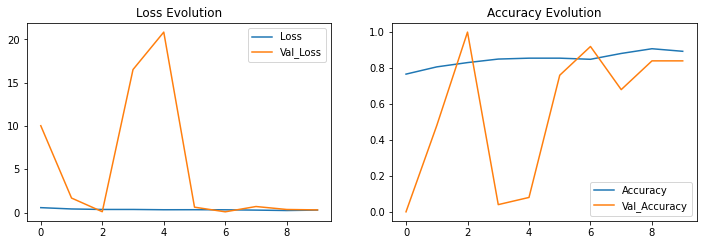

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")


2306/2306 [==============================] - 57s 25ms/step - loss: 2.5926 - accuracy: 0.5082
Test Accuracy: 50.82%
788/788 [==============================] - 97s 123ms/step - loss: 0.2647 - accuracy: 0.8917
Train Accuracy: 89.17%
